<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 平均値差の検定（対応なし）

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
from statsmodels.stats.proportion import proportions_ztest

## 平均値差の検定

ある2つの母集団の平均値に差があるのかを調べる検定を**平均値差の検定**といいます。  
$t$**検定**と呼ばれることもあります。

最も有名な検定で、論文を書く際などにも用いられているようです。

### 対応ありと対応なし

$2$つの母集団からそれぞれ平均値を計算したとします。

条件を変えても測定した母集団が同じであることを**対応あり**といいい、  
それぞれの条件において測定した母集団が異なることを**対応なし**といいます。  

**対応あり**の場合はかなり難しいので、今回は**対応なし**の検定について見ていきます。

## 平均値差の検定（大標本の場合）

2つの標本から得た標本平均を使って  
母平均が等しいかを検定していきましょう。

[こちら](https://bit.ly/3Kc60n3)の問題を解いていきます。

※大体30個ほど標本が取れれば、大標本として検定できるといわれています

### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**両側検定**になります）

帰無仮説$H_0$：「1組と2組の算数のテストの平均点は等しい」  
対立仮説$H_1$：「1組と2組の算数のテストの平均点には差がある」

#### ② 帰無仮説のもとで標本観察を行う 

それぞれの母集団の平均を $\mu_1 , \mu_2$ 、標準偏差を $\sigma_1,\sigma_2$とした場合を考えます。

標本平均$\bar{x}_1$が従う確率分布は、$n$が大きいので、  
母集団の確率分布にかかわわず正規分布です。

平均 $=\mu_1$   
分散 $=\frac{\sigma_1^2}{n_1}$

標本平均$\bar{x}_2$が従う確率分布は、$n$が大きいので、  
母集団の確率分布にかかわわず正規分布です。

平均 $=\mu_2$   
分散 $=\frac{\sigma_2^2}{n_2}$

今回求めたいのは $\bar{x}_1-\bar{x}_2$ が従う確率分布です。

どのような確率分布に従うのでしょうか？

今回は$\bar{x}_1,\bar{x}_2$ともに正規分布に従うため、  
比率の差の標本分布の時と同様、**平均の差**と**分散の和**が  
平均の差の標本分布の標本値になります。

よって、標準偏差は以下のようになります。

$$
\sigma = \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}
$$

$\sigma_1^2$と$\sigma_2^2$は母集団の分散なので不定値です。  
そのため、代わりに**不偏分散** $s^{'2}_1$と $s^{'2}_2$を使います。

$$
\sigma = \sqrt{\frac{s^{'2}_1}{n_1}+\frac{s^{'2}_2}{n_2}}
$$

今回は帰無仮説が正しいと仮定しているので、$\mu_1=\mu_2$ となります。

大標本であるので、標準化をすれば標準正規分布の形に持っていけます。

$$
z = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{s^{'2}_1}{n_1}+\frac{s^{'2}_2}{n_2}}}
$$

上の式に従って$z$値を導出します。

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

②で導出した$z$値と、有意水準に基づく$z$値を比較し、  
($p$**値を求めて**) 棄却が必要かどうか決めます。  

### Pythonによる仮説検定

では母平均の差の検定（大標本の場合）を行っていきましょう。

In [2]:
n1 = 30      # 1組の生徒数
n2 = 32      # 2組の生徒数
mean1 = 75   # 1組の平均点
mean2 = 70   # 2組の平均点
var1 = 5**2  # 1組の不偏分散
var2 = 8**2  # 2組の不偏分散

In [3]:
z = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)
print(f"検定統計量のz値:{z}")  # t値とは少しズレる

検定統計量のz値:2.9704426289300225


* $z$値が$1.96$より大きくなった

この一点から、帰無仮説$H_0$を棄却することができます。  
よって、対立仮説$H_1$を採択します。

## 平均値差の検定（小標本の場合その1）

「2つの母集団の分布が正規分布ではない」と分かっている場合は、  
**ノンパラメトリック検定**を行う必要があります。  

かなり難しいので、本資料では登場しません。  
[こちら](https://bellcurve.jp/statistics/course/26258.html)を参照してください。


「2つの母集団が正規分布である」という前提の元で、  
なおかつ、「母分散が等しい」という前提の元では、  
**スチューデントの$t$検定**を行います。  

一般的に$t$検定といわれたらこの**スチューデントの$t$検定**を指します。

2つの標本から得た標本平均を使って  
母平均が等しいかを検定していきましょう。

ここでは都道府県別の男性と女性の平均睡眠時間に差があるかを検定します。  
`todohuken_kaidata.csv`をインポートしてください。


In [4]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**両側検定**になります）

帰無仮説$H_0$：「男性と女性の間で睡眠時間の平均値に差がない」  
対立仮説$H_1$：「男性と女性の間で睡眠時間の平均値に差がある」

#### ② 帰無仮説のもとで標本観察を行う 

それぞれの母集団の平均を $\mu_1 , \mu_2$ 、標準偏差を $\sigma_1,\sigma_2$とした場合を考えます。

標本平均$\bar{x}_1$が従う確率分布は、$n$が大きいので、  
母集団の確率分布にかかわわず正規分布です。

平均 $=\mu_1$   
分散 $=\frac{\sigma_1^2}{n_1}$

標本平均$\bar{x}_2$が従う確率分布は、$n$が大きいので、  
母集団の確率分布にかかわわず正規分布です。

平均 $=\mu_2$   
分散 $=\frac{\sigma_2^2}{n_2}$

今回求めたいのは $\bar{x}_1-\bar{x}_2$ が従う確率分布です。

どのような確率分布に従うのでしょうか？

今回は$\bar{x}_1,\bar{x}_2$ともに正規分布に従うため、  
比率の差の標本分布の時と同様、**平均の差**と**分散の和**が  
平均の差の標本分布の標本値になります。

よって、標準偏差は以下のようになります。

$$
\sigma = \sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}
$$

$\sigma_1=\sigma_2$であるので、式は次のように変形できます。

$$
\sigma = \sigma_1\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}
$$

不定値$\sigma_1$の代わりとして、今回は**不偏分散をそのまま使いません**。   
二つの標本を一つにまとめてしまいます。  

その全データ$(n_1+n_2)$における平均からの偏差の2乗和を  
全体の自由度で割ったものを使って、$\sigma_1^2$を推定します。

##### 全データにおける平均からの偏差の2乗和

$\sum^{n_1}_{i=1}(x_{1i}-\bar{x}_1)^2$と$\sum^{n_2}_{i=1}(x_{2i}-\bar{x}_2)^2$を足し合わせたものになります。



${{s’}_1}^2=\frac{1}{(n_1-1)\sum^{n_1}_{i=1}(x_{1i}-\bar{x}_1)^2},{{s’}_2}^2=\frac{1}{(n_2-1)\sum^{n_2}_{i=1}(x_{2i}-\bar{x}_2)^2}$より、

$(n_1-1){{s’}_1}^2+(n_2-1){{s’}_2}^2$と導出することができます。

##### 全体の自由度

全体の自由度は$n_1-1$と$n_2-1$を足し合わせた    
$n_1+n_2-2$になります。

##### 全データにおける平均からの偏差の2乗和を全体の自由度で割ったもの

以下の式になります。  

$$
\frac{(n_1-1){{s’}_1}^2+(n_2-1){{s’}_2}^2}{n_1+n_2-2}
$$

##### $t$値の導出

これを先ほどの$\sigma = \sigma_1\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$に代入します。

$$
\hat{\sigma}=\sqrt{\frac{(n_1-1){{s’}_1}^2+(n_2-1){{s’}_2}^2}{n_1+n_2-2}}\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}
$$

$\hat{\sigma}^2$は$\sigma^2$の推定値です。  


今回は帰無仮説が正しいと仮定しているので、$\mu_1=\mu_2$ となります。

推定値$\hat{\sigma}^2$を用いているため、標準化したときの値は$t$**値**になります。

$$
t=\frac{\bar{x}_1-\bar{x}_2-(\mu_1-\mu_2)}{\sqrt{\frac{(n_1-1){{s’}_1}^2+(n_2-1){{s’}_2}^2}{n_1+n_2-2}}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}=\frac{\bar{x}_1-\bar{x}_2}{\hat{\sigma}}
$$

上の式に従って$t$値を導出します。

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

②で導出した$t$値と、有意水準に基づく$t$値を比較し、  
($p$**値を求めて**) 棄却が必要かどうか決めます。  

### Pythonによる仮説検定

では母平均の差の検定（スチューデントの$t$検定）を行っていきましょう。

In [5]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


In [6]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
female_sleep = df["15歳以上の平均睡眠時間（女）"] 

tt , pp = stats.ttest_ind(male_sleep,female_sleep)

nk = float(Decimal(str(tt)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{nk}")
nkp = float(Decimal(str(pp*100)).quantize(Decimal('0.000000000001'), rounding=ROUND_HALF_UP))
print(f"p値：{nkp}%")

検定統計量のt値:8.338
p値：7.1e-11%


自由度$47$の$t$分布における有意水準$5$%に対応する値は$2.012$です。

In [7]:
float(Decimal(str(t.ppf(0.975, len(df)-1))).quantize(Decimal('0.001'),
                                                   rounding=ROUND_HALF_UP))

2.013

* $t$値が$2.012$より大きくなった
* $p$値が$5$%より小さくなった

この二点から、帰無仮説$H_0$を棄却することができます。  
よって、対立仮説$H_1$を採択します。


In [8]:
print("したがって、男性と女性の間では睡眠時間に差がある")

したがって、男性と女性の間では睡眠時間に差がある


## 平均値差の検定（小標本の場合その2）

「2つの母集団が正規分布である」という前提の元で、  
なおかつ、「母分散が等しいとは限らない」という前提の元では、  
**ウェルチの$t$検定**を行います。  


2つの標本から得た標本平均を使って  
母平均が等しいかを検定していきましょう。

ここでは都道府県別の男性と女性の平均睡眠時間に差があるかを検定します。  
`todohuken_kaidata.csv`をインポートしてください。


In [9]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


### 仮説検定のステップ（再掲）
①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

#### ① 帰無仮説と対立仮説を立てる  

帰無仮説と対立仮説は以下のようになります。（**両側検定**になります）

帰無仮説$H_0$：「男性と女性の間で睡眠時間の平均値に差がない」  
対立仮説$H_1$：「男性と女性の間で睡眠時間の平均値に差がある」

#### ② 帰無仮説のもとで標本観察を行う 

それぞれの母集団の平均を $\mu_1 , \mu_2$ 、標準偏差を $\sigma_1,\sigma_2$、  
標本平均を $\bar{x}_1,\bar{x}_2$、不偏分散を $s^{'2}_1,s^{'2}_2$ とした場合を考えます。

ウェルチの検定のときは、統計量として  
「大標本の場合の$z$値と同値の$t$値」を使います。

$$
t = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{\frac{s^{'2}_1}{n_1}+\frac{s^{'2}_2}{n_2}}}
$$


また、自由度は以下の式で近似できます。

$$
\upsilon=\frac{\Bigl(\frac{s^{'2}_1}{n_1}+\frac{s^{'2}_2}{n_2}\Bigr)^2} {\frac{s^{'4}_1}{n_1^2(n_1-1)}+\frac{s^{'4}_2}{n_2^2(n_2-1)}
}
$$

#### ③ 帰無仮説を棄却できるかどうかを確認する

有意水準を$5$%に設定します。

②で導出した$t$値と、有意水準に基づく$t$値を比較し、  
($p$**値を求めて**) 棄却が必要かどうか決めます。  

### Pythonによる仮説検定

では母平均の差の検定（ウェルチの$t$検定）を行っていきましょう。

ここでは都道府県別の男性と女性の平均睡眠時間に差があるかを検定します。  
`todohuken_kaidata.csv`をインポートしてください。

In [10]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


In [11]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
female_sleep = df["15歳以上の平均睡眠時間（女）"] 

tt , pp = stats.ttest_ind(male_sleep , female_sleep , equal_var=False)

nk = float(Decimal(str(tt)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{nk}")
nkp = float(Decimal(str(pp*100)).quantize(Decimal('0.000000000001'),rounding=ROUND_HALF_UP))
print(f"p値：{nkp}%")

検定統計量のt値:8.338
p値：7.4e-11%


自由度$47$の$t$分布における有意水準$5$%に対応する値は$2.012$です。

In [12]:
float(Decimal(str(t.ppf(0.975, len(df)-1))).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))

2.013

* $t$値が$2.012$より大きくなった
* $p$値が$5$%より小さくなった

この二点から、帰無仮説$H_0$を棄却することができます。  
よって、対立仮説$H_1$を採択します。


In [13]:
print("したがって、男性と女性の間では睡眠時間に差がある")

したがって、男性と女性の間では睡眠時間に差がある


## Pythonによる描画

平均値差の検定をするときは、$t$検定を行うだけではなくて、  
データの分布も一緒に確認するようにしましょう。

まずはヒストグラムです。

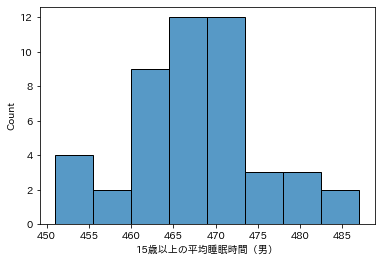

In [14]:
sns.histplot(df["15歳以上の平均睡眠時間（男）"])

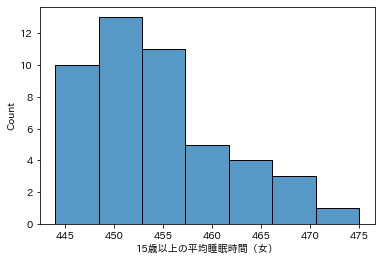

In [15]:
sns.histplot(df["15歳以上の平均睡眠時間（女）"])

続いて箱ひげ図です。

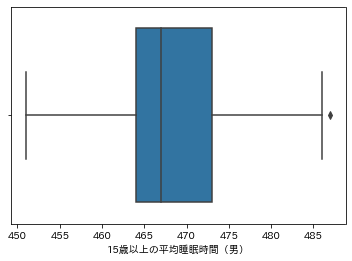

In [16]:
sns.boxplot(data=df,x="15歳以上の平均睡眠時間（男）")

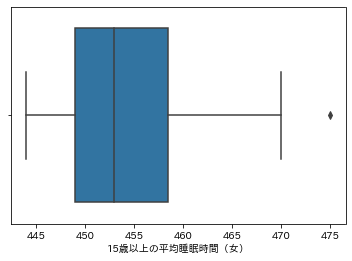

In [17]:
sns.boxplot(data=df,x="15歳以上の平均睡眠時間（女）")

男性の方が全体の分布が上にありそうなこと、  
女性の方には少し大きめの外れ値があること、などが分かります。

## 3つの$t$検定の使い分け

Pythonなどの統計ツールで$t$検定を行いたいときは、簡単に実行できるため、  
大標本であってもウェルチの$t$検定を行うのが慣習です。



また、等分散であるといえるときはスチューデントの$t$検定を使ってしまってもいいですが、  
等分散を言うのが大変なので、基本的にはウェルチの$t$検定を使うことが多いです。   
（Pythonなどの統計ツールの場合） 
